In [1]:
%pip install ipykernel
%pip install opencv-python
%pip install keras
%pip install scikit-learn
%pip install tensorflow
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import cv2
import numpy as np
from keras.applications import VGG16
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [3]:
def load_images(folder):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            img = cv2.resize(img, (224, 224))  # Cambiamos la dimensión para que coincida con la dimensión de entrada de VGG-16
            images.append(img)
            if 'Dog' in folder:
                labels.append(1)
            elif 'Cat' in folder:
                labels.append(0)
    return images, labels

dogs_images, dogs_labels = load_images('Data/Dog')
cats_images, cats_labels = load_images('Data/Cat')

# Combinamos los arrays de perros y gatos
images = np.array(dogs_images + cats_images)
labels = np.array(dogs_labels + cats_labels)

# One-hot encoding de las etiquetas
labels = to_categorical(labels)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2)

In [5]:
# Cargamos la red VGG16, asegurándonos de que se dejan fuera las capas superiores de la red preentrenada (head FC layer)
baseModel = VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

# Construimos la capa que se colocará en la parte superior del modelo base (baseModel)
model = Sequential()
model.add(baseModel)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(2, activation='softmax'))  # Dos clases (perro y gato), por lo que la capa de salida tiene 2 neuronas

# Congelamos las capas del modelo base para que no se actualicen durante el entrenamiento
for layer in baseModel.layers:
    layer.trainable = False

# Compilamos el modelo 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenamos el modelo
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

# Evaluamos el modelo
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 436s 18s/step - accuracy: 0.8067 - loss: 17.9618 - val_accuracy: 0.9602 - val_loss: 2.6117
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 457s 18s/step - accuracy: 0.9865 - loss: 0.6644 - val_accuracy: 0.9701 - val_loss: 2.2174
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 450s 18s/step - accuracy: 0.9994 - loss: 0.0164 - val_accuracy: 0.9701 - val_loss: 1.4730
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 503s 18s/step - accuracy: 0.9999 - loss: 5.6952e-04 - val_accuracy: 0.9701 - val_loss: 1.6809
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 462s 19s/step - accuracy: 0.9972 - loss: 0.0763 - val_accuracy: 0.9652 - val_loss: 2.5181
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 491s 18s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.9652 - val_loss: 2.5982
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 465s 19s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.9652 - val_loss: 2.6044
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 46

In [17]:
# Hacemos una predicción con una nueva imagen para comprobar que el modelo funciona
target='mishi.jpeg'
img = cv2.imread(target)
img = cv2.resize(img, (224, 224))
img = np.expand_dims(img, axis=0)
pred = model.predict(img)
print(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 895ms/step
[[1. 0.]]


Gato


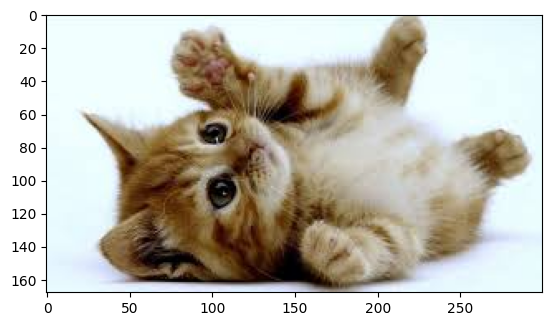

In [18]:
# Mostramos la etiqueta de la predicción
if pred[0][0] > pred[0][1]:
    print('Gato')
else:
    print('Perro')

# Mostramos la imagen con la etiqueta en el notebook
import matplotlib.pyplot as plt
img = cv2.imread(target)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) 